In [1]:
import  tensorflow as tf 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen=ImageDataGenerator(rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [43]:
train_generator=datagen.flow_from_directory('xray_dataset_covid19/train/',target_size=(64,64),class_mode='binary')

Found 148 images belonging to 2 classes.


In [44]:
test_generator=datagen.flow_from_directory('xray_dataset_covid19/test/',target_size=(64,64),class_mode='binary')

Found 40 images belonging to 2 classes.


In [45]:
train_generator

In [46]:
data,label=next(train_generator)

In [47]:
data.shape

(32, 64, 64, 3)

In [48]:
import matplotlib.pyplot as plt 

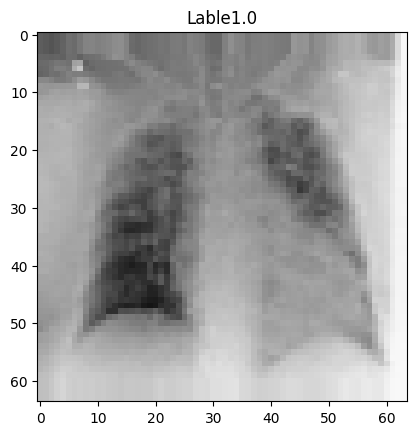

In [49]:
plt.imshow(data[1])
plt.title(f"Lable{label[1]}")
plt.show()

In [50]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [83]:
def model():
    cnn=tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

    return cnn

In [84]:
model=model()

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
result=model.fit(x=train_generator,epochs=20)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 867ms/step - accuracy: 0.8218 - loss: 0.4354
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7917 - loss: 0.4293
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 975ms/step - accuracy: 0.8008 - loss: 0.4225
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 894ms/step - accuracy: 0.8634 - loss: 0.3166
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8671 - loss: 0.3442
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9161 - loss: 0.2222
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8795 - loss: 0.2829
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9066 - loss: 0.2852
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9103 - loss: 0.2036
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 984ms/step - accuracy: 0.9299 - loss: 0.1741
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 955ms/step - accuracy: 0.9102 - loss: 0.1876
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9131 - loss: 0.2334
Epoch 13/2

In [96]:
model.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.9458 - loss: 0.1331


[0.12774883210659027, 0.949999988079071]

In [97]:
pred=model.predict(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


In [98]:
pred_test=[]
for i in range(len(pred)):
    if(pred[i]>0.5):
        pred_test.append(1)
    else:
        pred_test.append(0)

In [99]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [100]:
y_true = test_generator.classes

In [101]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [102]:
accuracy_score(y_true,pred_test)

0.6

In [109]:
import numpy as np 

In [110]:
import pandas as pd 

In [113]:
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array

new_image=load_img('xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0117-0001.jpeg',target_size=(64,64))
new_image=img_to_array(new_image)
new_image=np.expand_dims(new_image,axis=0)
result=model.predict(new_image)
print(result)
if result[0][0]>=0.5:
    predicts='normal'
else:
    predicts='avgad'
predicts

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.]]


'avgad'

In [115]:
model.save('deploy_chest_test.h5')